<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Derivatives

Derivatives are about rates of change.

#### Setup

In [1]:
!git clone https://github.com/pareshrchaudhary/numericalmethods.git

Cloning into 'numericalmethods'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 207 (delta 48), reused 9 (delta 9), pack-reused 125
Receiving objects: 100% (207/207), 1010.23 KiB | 14.43 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [2]:
import sys
sys.path.append("/content/numericalmethods")
import numpy as np
import matplotlib.pyplot as plt
import math
from numericalmethods import limits

## 1) Derivatives Idea

#### 1.1) Average rate of change

We know what average rate of change is and how to calculate it -

Average rate of change = $\frac{Δx}{Δy}$

Let's take an example.

> Say we drop a ball from the top of a building of height $h$ and it takes $t$ = 10 seconds for the ball to hit the ground. The displacement of the ball is governed by the function of motion given below.

Initial height is given by $h_0$, initial velocity is given by $v_0$ and $g$ is gravitational constant.

In [3]:
def f(t):
    """
    This function models the vertical displacement of a falling object with time.

    Input: t (float): Time in seconds.

    Output: float: Vertical displacement (height) in meters.
    """
    h_0 = 490.5
    v_0 = 0
    g = 9.81

    return h_0 + v_0 * t - 0.5 * g * t**2

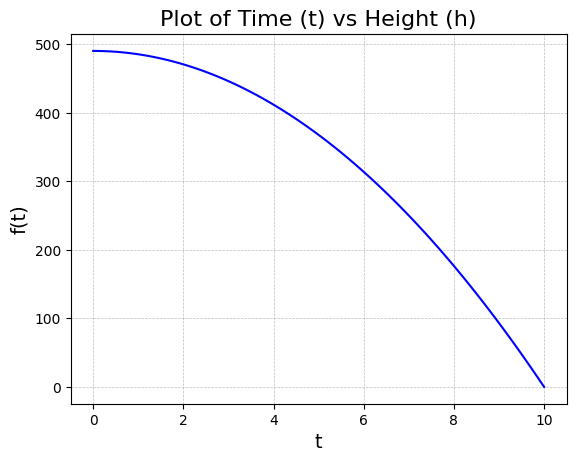

In [4]:
t = np.linspace(0, 10, 100)
fn = [f(i) for i in t]

plt.plot(t, fn, color='blue')
plt.xlabel('t', fontsize=14)
plt.ylabel('f(t)', fontsize=14)
plt.title('Plot of Time (t) vs Height (h)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()

How can we calculate average rate of change of height(displacement)?
\
\
Average = $\frac{Δh}{Δt}$ = $\frac{h_2 - h_1}{t_2 - t_1}$

In [5]:
h_2 = f(6)
h_1 = f(0)
h_2, h_1

(313.91999999999996, 490.5)

In [6]:
average = (h_2-h_1)/(6-0)
average

-29.430000000000007

#### 1.2) Instantaneous rate of change

What if we want to calculate "_instantaneous_" rate of change at $t$ = 6?

In [7]:
instant = (f(6.1) - f(6))/(6.1 - 6)
instant

-59.35049999999954

Is this right?

No, that is just average rate of change in milliseconds. For the rate to be instantaneous we want the difference 6.1 - 6 to be so small that it will be very very close to 0.

We need the difference to tend to zero for getting instantaneous rate of change and how do we get that?

LIMITS ofcourse!!!
\
\
$\lim_{{x \to 6}} \frac{f(b) - f(6)}{b-6}$
\
\
**In simpler words, if we add a very very tiny value (almost close to zero) to the function at a given point, then how much does the function change at that point?**
\
\
$\lim_{{dx \to 0}} \frac{f(6+dx) - f(6)}{dx}$

In [8]:
point = 6
lim = limits.Limits()

In [9]:
def derivative(func, point):
  def fn(dx):
    return (func(point+dx) - func(point))/(dx)

  return lim.evaluate_limit(fn, 0)[1]

In [10]:
derivative(f, 6)

-58.86

#### 1.3) Geometric interpretation of derivatives

Equation of line: $y = m*x + c \implies (y_2 - y_1) = m* (x_2-x_1) + c$  
\
where $m$ = slope = $\frac{rise}{run} = \frac{Δx}{Δy} = \frac{f(b)-f(a)}{b-a}, c =$ intercept.

In [11]:
def draw_line(point1, point2, t):
  """
  Draw line using slope intercept form of line y = mx + c

  Input: point1, point2, scale

  Ouput: line points
  """
  slope = (point1[0] - point2[0]) / (point1[1] - point2[1])
  intercept = point1[0] - slope * point1[1]
  line = slope * t + intercept
  return line

We have two things to figure out geometrically-
1.   Average rate of change
2.   Instantaneous rate of change (Derivative)


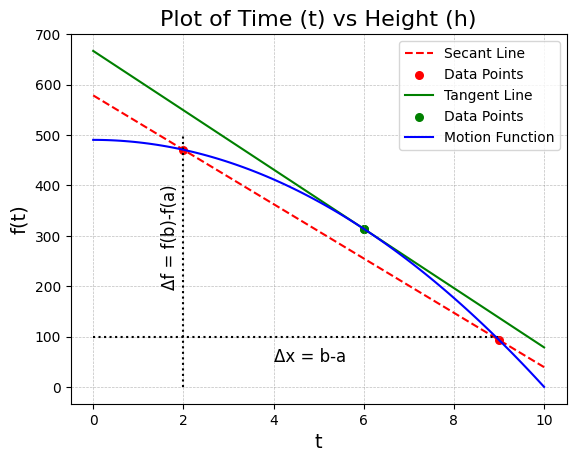

In [12]:
t = np.linspace(0, 10, 100)
fn = [f(i) for i in t]

h_1, t_1 = f(2), 2
h_2, t_2 = f(9), 9
secant_line = draw_line([h_1, t_1], [h_2, t_2], t)
plt.plot(t, secant_line, color='red', linestyle='--', label="Secant Line")
plt.plot([2,2], [0,500], color='black', linestyle=':')
plt.plot([0,9], [100,100], color='black', linestyle=':')
plt.text(4, 50, 'Δx = b-a', fontsize=12, color='black')
plt.text(1.5, 200, 'Δf = f(b)-f(a)', fontsize=12, color='black', rotation=90)
plt.scatter([t_1, t_2], [h_1, h_2], c='red', marker='o', s=30, label='Data Points')

h_1, t_1 = f(6), 6
h_2, t_2 = f(6.0000001), 6.0000001
tangent_line = draw_line([h_1, t_1], [h_2, t_2], t)
plt.plot(t, tangent_line, color='green', linestyle='-', label="Tangent Line")
plt.scatter([t_1, t_2], [h_1, h_2], c='green', marker='o', s=30, label='Data Points')

plt.plot(t, fn, color='blue', label='Motion Function')
plt.xlabel('t', fontsize=14)
plt.ylabel('f(t)', fontsize=14)
plt.title('Plot of Time (t) vs Height (h)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

Both the red dots approach the green dot and eventually the secant line turn into a tangent line.

Secant Line: $y = \frac{f(b)-f(a)}{b-a} *(x-a) + f(a)$


Tangent Line: $y = f'(a) *(x-a) + f(a)$

As $b \to a$,
*   **Physical**:  _Average rate of change_ $\to$ _Instantaneous rate of change_
*   **Geometric**:  _Secant Line_ $\to$ _Tangent Line_
*   **Symbolic**:  $\frac{f(b)-f(a)}{b-a} \to f'(a)$


#### 1.4) Derivative

**The derivative of $f(x)$ at $x = a$ represents the instantaneous rate of change of $f(x)$ at $x = a$**


**$f'(x) = \lim_{{dx \to 0}} \frac{f(x+dx) - f(x)}{dx}$**

## 2) Derivative as a function

When the graph of a function is nice and smooth, without any discontinuities, corners or other weird behavior, we can find the slope of the tangent line at any point.

**_Derivative of the function seen as a function._**


Derivative of the function gives tangent line at every point on the function varied by input.

Let's use the previous function for plotting derivative wrt different input-

In [13]:
def f(t):
    """
    This function models the vertical displacement of a falling object with time.

    Input: t (float): Time in seconds.

    Output: float: Vertical displacement (height) in meters.
    """
    h_0 = 490.5
    v_0 = 0
    g = 9.81

    return h_0 + v_0 * t - 0.5 * g * t**2

In [14]:
def derivative(func, point):
  def fn(dx):
    return (func(point+dx) - func(point))/(dx)

  return lim.evaluate_limit(fn, 0)[1]

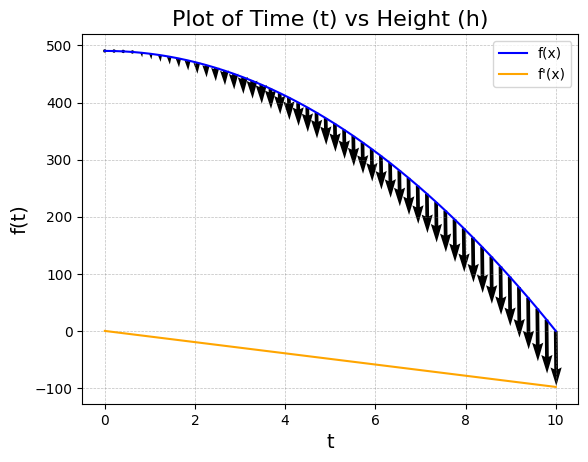

In [15]:
t = np.linspace(0, 10, 50)
fn = [f(i) for i in t]
fxdx = np.array([[derivative(f, i), 1] for i in t])

plt.plot(t, fn, color='blue', label='f(x)')
plt.plot(t, fxdx[:,0], color='orange', label="f'(x)")

plt.quiver(t, fn, fxdx[:, 1], fxdx[:, 0], cmap='viridis')
plt.xlabel('t', fontsize=14)
plt.ylabel('f(t)', fontsize=14)
plt.title('Plot of Time (t) vs Height (h)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

The blue line is the function $f(x)$ and the derivative of $f(x)$ shown by orange line implies that the rate of change of $f(x)$ wrt $t$ is linearly decreasing.

The force acting on the free falling body is earth's gravitational pull given by black arrows. For every timestep this force is adding up to the rate of change.

## 3) Calculating Derivatives

#### 3.1) Derivative of Linear Functions

In [16]:
def f(x):
  return 0.5*x -1

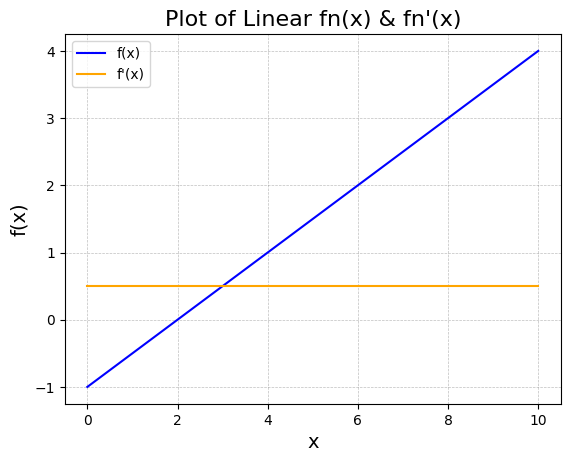

In [17]:
t = np.linspace(0, 10, 50)
fn = [f(i) for i in t]
fxdx = np.array([[derivative(f, i), 1] for i in t])

plt.plot(t, fn, color='blue', label='f(x)')
plt.plot(t, fxdx[:,0], color='orange', label="f'(x)")

plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.title("Plot of Linear fn(x) & fn'(x)", fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

Derivative of linear functions is constant at all points on the linear functions because tangent is the same.

#### 3.2) Derivatives of constant multiples

In [18]:
def g(x):
  def f(x):
    return 0.5*x -1
  return f(x)*2

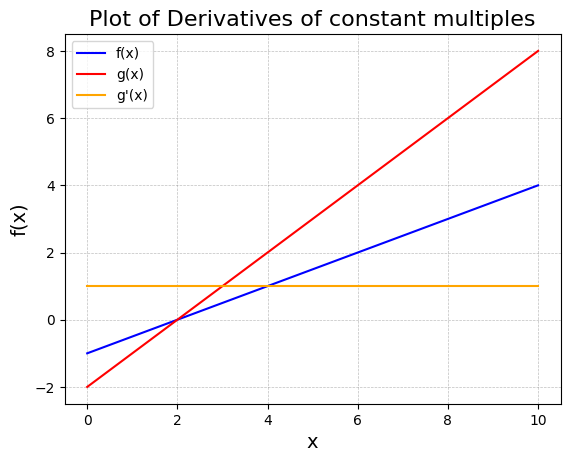

In [19]:
t = np.linspace(0, 10, 50)
fn = [f(i) for i in t]
gn = [g(i) for i in t]
fxdx = np.array([[derivative(g, i), 1] for i in t])

plt.plot(t, fn, color='blue', label='f(x)')
plt.plot(t, gn, color='red', label='g(x)')
plt.plot(t, fxdx[:,0], color='orange', label="g'(x)")

plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.title("Plot of Derivatives of constant multiples", fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

Suppose that  $g(x)=kf(x)$  for all  $x$ , where  $k$  is a constant. Then $g′(x)=kf′(x)$  at any point  $x$  where  $f()$  is differentiable.

#### 3.3) Derivative of Sum

Given $f(x)$, $g(x)$ and $h(x) = f(x) + g(x)$

Prove $h′(x)=f′(x)+g′(x)$ at all points where $f(x)$ and $g(x)$ are differentiable.

In [20]:
def f(x):
  return x**2

def g(x):
  return x**3

def h(x):
  def f(x):
    return x**2
  def g(x):
    return x**3
  return f(x) + g(x)

In [21]:
t = np.linspace(-50, 50, 10)

fxdx = np.array([derivative(f, i) for i in t])
gxdx = np.array([derivative(g, i) for i in t])
dx = fxdx + gxdx

hxdx = np.array([derivative(h, i) for i in t])

In [22]:
result = [math.isclose(x, y, rel_tol=1e-6) for x, y in zip(dx, hxdx)]
result

[True, True, True, True, True, True, True, True, True, True]

You can even try proving it using geometric methods.

#### 3.4) Power Rule

This concept has more to it when expressed symbolically. But lets still draw a simple conclusion-

If $n$ is any fixed number, and  $f(x)=x^n$, then  $f′(x)=n*x^{n−1}$.

Here are two functions $f2(x)=x^2$ and $f3(x)=x^3$ and their analytical derivatives are $(2*x)$ and $(3*x^2)$ respectively.   
Let's evaluate power rule numerically for both the functions-

In [23]:
def f2(x):
  return x**2

def f3(x):
  return x**3

Here are the drivatives of the above two functions on different points-

In [24]:
integer_sequence = list(range(-5, 6))
f2dx = np.array([derivative(f2, i) for i in integer_sequence])
f3dx = np.array([derivative(f3, i) for i in integer_sequence])

print(f2dx)
print(f3dx)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
[75. 48. 27. 12.  3.  0.  3. 12. 27. 48. 75.]


In [25]:
f2_num = np.array([2*i for i in integer_sequence], np.float64)
f3_num = np.array([3*(i**2) for i in integer_sequence], np.float64)

print(f2_num)
print(f3_num)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
[75. 48. 27. 12.  3.  0.  3. 12. 27. 48. 75.]


In [26]:
f2dx == f2_num, f3dx == f3_num

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]))

It turns out that the derivatives are function of $(2*x)$ and $(3*x^2)$ respectively. So from this experiment we can extrapolate the formula for the derivative of $f(x)=x^n$.

## 4) Second Derivatives and Higher

#### 4.1) Second derivative

We have seen how derivative is calculated using limits-

$f'(x) = \lim_{{dx \to 0}} \frac{f(x+dx) - f(x)}{dx}$

Now if we want to calculate derivative of derivate we will plug $f'(x)$ into itself to get the second derivative.

**$f''(x) = \lim_{{dx \to 0}} \frac{f'(x+dx) - f'(x)}{dx}$**

This is giving us rate of change of first derivative at a particular point $x$.

In [27]:
def f(x):
  return x**3 + 2*x**2 + 3*x + 1

In [28]:
def derivative(func, point):
  def fn(dx):
    return (func(point+dx) - func(point))/(dx)
  return lim.evaluate_limit(fn, 0)[1]

In [29]:
derivative(f, 3)

42.0

In [30]:
def second_derivative(func, point):

  def derivative_internal(dx):

    def derivative(func_1, point):
      def fn(dx):
        return (func_1(point+dx) - func_1(point))/(dx)
      return lim.evaluate_limit(fn, 0)[1]

    return (derivative(func, point+1e-3) - derivative(func, point))/(1e-3)

  return lim.evaluate_limit(derivative_internal, 0)[1]

In [31]:
second_derivative(f,3)

22.0

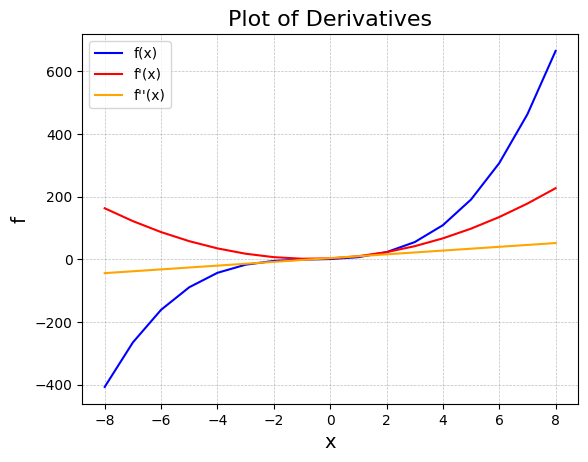

In [32]:
integer_sequence = list(range(-8, 9))
f_num = np.array([f(i) for i in integer_sequence])
fdx = np.array([derivative(f, i) for i in integer_sequence])
fdxdx = np.array([second_derivative(f, i) for i in integer_sequence])

plt.plot(integer_sequence, f_num, color='blue', label='f(x)')
plt.plot(integer_sequence, fdx, color='red', label="f'(x)")
plt.plot(integer_sequence, fdxdx, color='orange', label="f''(x)")

plt.xlabel('x', fontsize=14)
plt.ylabel('f', fontsize=14)
plt.title("Plot of Derivatives", fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

What is this graph telling us?



1.   $f'(x)$

> We can conclude two important phenomenon from the first derivative of $f(x)$-
  - The rate of change of function $f(x)$ with respect to $x$ increases as $x$ increases or decreases.
  - It does not tell us any thing about the direction of $f(x)$ increase.

2.   $f''(x)$

> Second derivative tells us what the first derivative couldn't tell. It says everthing about the direction of increase.   

> As $x \rightarrow \infty, f(x)\rightarrow \infty$ and as $x\rightarrow - \infty, f(x)\rightarrow -\infty$.





Second Derivative and Concavity


1.   On intervals where **$f''(x)>0$**, the function $f(x)$ is **concave up** $⇑$.
2.   On intervals where **$f''(x)<0$**, the function $f(x)$ is **concave down** $⇓$.




#### 4.2) Higher Derivatives

In [33]:
def f(x):
  return x**3

In [34]:
class Derivative:
  def __init__(self, func, dx = 1e-6):
    self.func = func
    self.dx = dx
    self.order = 0

  def derivative(self, point):
    def fn(dx):
      return (self.func(point+self.dx) - self.func(point))/(self.dx)
    self.order += 1
    return lim.evaluate_limit(fn, 0)[1]

In [35]:
dx = Derivative(f)
dx.derivative(3)

27.0

In [36]:
dx2 = Derivative(dx.derivative, dx = 1e-3)
dx2.derivative(3)

18.0

## 5) Trigonometric Derivatives

_At this point you can go for formal mathematical proofs or use these function as blackbox functions and evaluate derivatives._

$\frac{d}{dx}sin(x) = cos(x)$  

$\frac{d}{dx}cos(x) = −sin(x)$  

$\frac{d^2}{dx^2}sin(x) = −sin(x)$  

$\frac{d^2}{dx^2}cos(x) = −cos(x)$  

$\frac{d}{dx}tan(x) = sec^2(x)$  

In [37]:
def sin(x):
  return 10000*math.sin(math.radians(x))

In [38]:
dx = Derivative(sin)
dx2 = Derivative(dx.derivative, dx = 1e-3)

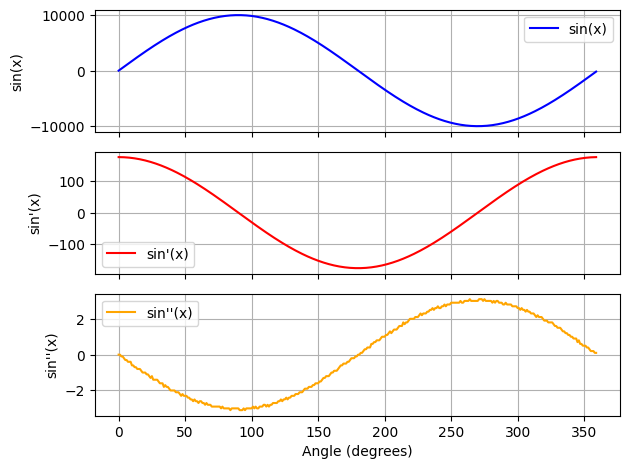

In [39]:
integer_sequence = list(range(0, 360))
f_num = np.array([sin(i) for i in integer_sequence])
fdx = np.array([dx.derivative(i) for i in integer_sequence])
fdxdx = np.array([dx2.derivative(i) for i in integer_sequence])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.plot(integer_sequence, f_num, color='blue', label='sin(x)')
ax1.set_ylabel('sin(x)')

ax2.plot(integer_sequence, fdx, color='red', label="sin'(x)")
ax2.set_ylabel("sin'(x)")

ax3.plot(integer_sequence, fdxdx, color='orange', label="sin''(x)")
ax3.set_xlabel('Angle (degrees)')
ax3.set_ylabel("sin''(x)")

ax1.grid()
ax2.grid()
ax3.grid()
ax1.legend()
ax2.legend()
ax3.legend()
plt.tight_layout()
plt.show()

_Note: I am not calculating the second derivative with maximum precision because we only want visualisation._

## 6) Differentiation

_Nuts & Bolts of derivatives_

### 6.1) Product Rule

Say we have $h(x) = f(x)*g(x)$ and we want to calculate $h'(x) = \lim_{{\Delta x \to 0}} \frac{\Delta h}{\Delta x}$ -   

In [40]:
def f(x):
  return 3*(x**2)

def g(x):
  return 6*(x**2)

def h(x):
  return (3*(x**2)) * (6*(x**2))

We'll breakdown the task into smaller pieces.

1.   $\Delta h = ((f + \Delta f)*(g + \Delta g))  - (f.g)$ $⇒$ Numerator.
> $\Delta h = (f*g) + (f*\Delta g + g* \Delta f) + (\Delta f * \Delta g) - (f*g)$  
> $\Delta h = (f*\Delta g) + (g* \Delta f) + (\Delta f * \Delta g)$

2.  We got our Numerator now lets divide it by $\Delta x$ $⇒$ Denominator.
> $\frac{\Delta h}{\Delta x} = (f*\frac{\Delta g}{\Delta x}) + (g* \frac{\Delta f}{\Delta x}) + (\frac{\Delta f}{\Delta x}*\frac{\Delta g}{\Delta x} * \Delta x)$

3. Now let's apply limits to $\frac{\Delta h}{\Delta x}$.
>$\lim_{{\Delta x \to 0}} \frac{\Delta h}{\Delta x} = (f*\lim_{{\Delta x \to 0}}\frac{\Delta g}{\Delta x}) + (g* \lim_{{\Delta x \to 0}} \frac{\Delta f}{\Delta x}) + (\lim_{{\Delta x \to 0}} \frac{\Delta f}{\Delta x}*\frac{\Delta g}{\Delta x} * \Delta x)$
>$\lim_{{\Delta x \to 0}} \frac{\Delta h}{\Delta x} = f * g' + g * f'$

In [41]:
fx = Derivative(f, dx = 1e-08)
gx = Derivative(g, dx = 1e-08)
hx = Derivative(h, dx = 1e-08)

In [42]:
hx.derivative(2) == (f(2)*gx.derivative(2) + g(2)*fx.derivative(2))

True

So here we have product rule - **$h'(x) = f(x) * g'(x) + g(x) * f'(x)$**

```
If we nudge the input x by a tiny amount for both f(x) and g(x) then how much does the resulting function h(x) change?
```

### 6.2) Quotient Rule

For division we have some function given by $h(x) = \frac{f(x)}{g(x)}$

In [43]:
def f(x):
  return 3*(x**2)

def g(x):
  return 6*(x**2)

def h(x):
  return (3*(x**2)) / (6*(x**2))

1. We want to calculate
>$\Delta h = \frac{{f + \Delta f}}{{g + \Delta g}} - \frac{{f}}{{g}}$  
>
>
>$\Delta h = \frac{{f(g + \Delta g) - g(f + \Delta f)}}{{g(g + \Delta g)}}$


2. Expand the numerator:
>$\Delta h = \frac{({f * g) + (f * \Delta g) - (g * f) - (g * \Delta f})}{{(g * g) + (g * \Delta g)}} $  
>
>
>$\Delta h = \frac{{(f * \Delta g - g) * \Delta f}}{{(g * g) + (g * \Delta g)}}$


3. Divide the entire expression by $\Delta x$ to get the difference quotient:
>$\frac{{\Delta h}}{{\Delta x}} = \frac{{f * \Delta g - g * \Delta f}}{{g * g + g * \Delta g}} * \frac{{1}}{{\Delta x}}$

4. Now let's apply limits as $\Delta x \to 0$:
>$\lim_{{\Delta x \to 0}} \frac{{\Delta h}}{{\Delta x}} = \lim_{{\Delta x \to 0}} \frac{{(f * \Delta g) - (g * \Delta f)}}{{(g * g) + (g * \Delta g)}} * \lim_{{\Delta x \to 0}} \frac{{1}}{{\Delta x}}
$

5. Evaluate the limits:
>$\lim_{{\Delta x \to 0}} \frac{{\Delta h}}{{\Delta x}} = \frac{{(f * g') - (g * f')}}{{(g * g)}}$

In [44]:
fx = Derivative(f, dx = 1e-08)
gx = Derivative(g, dx = 1e-08)
hx = Derivative(h, dx = 1e-08)

In [45]:
hx.derivative(2) == ( ((f(2)*gx.derivative(2) - g(2)*fx.derivative(2))) / (g(2)**2) )

True

Therefore, the derivative of $(h(x) = \frac{{f(x)}}{{g(x)}})$ wrt $x$ is given by:  
**$h'(x) = \frac{{f(x) * g'(x) - g(x) * f'(x)}}{{g(x) * g(x)}}$** wherever $f'(x)$ & $g'(x)$ exists and $g(x) \neq 0$

### 6.3) Chain Rule

The best implementation of chain rule is already explain by one of the giants.  
Find it [here](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ).

In [46]:
class Unit:

  def __init__(self, data, _children=(), _op=''):
    self.data = data
    self.grad = 0
    self._backward = lambda:None
    self._prev = set(_children)
    self._op = _op

  def __repr__(self):
    return f"Unit(data={self.data})"

  def __rmul__(self, other):
    return self * other

  def __add__(self, other):
    other = other if isinstance(other, Unit) else Unit(other)
    out = Unit(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    return out

  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)

  def __mul__(self, other):
    other = other if isinstance(other, Unit) else Unit(other)
    out = Unit(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), 'only ints and floats'
    out = Unit(self.data**other, (self, ), f'**{other}')
    def _backward():
      self.grad += other * self.data ** (other -1) * out.grad
    out._backward = _backward
    return out

  def __truediv__(self, other):
    return self * other**-1

  def exp(self):
    x = self.data
    out = Unit(math.exp(x), (self, ), 'exp')
    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def sin(self):
    x = self.data
    out = Unit(math.sin(x), (self,), 'sin')
    def _backward():
      self.grad += math.cos(out.data) * out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [47]:
x1 = Unit(2.0)
x2 = Unit(0.0)

w1 = Unit(-3.0)
w2 = Unit(1.0)

b = Unit(6.8813735870195432)

x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1+x2w2

n = x1w1x2w2 + b

e = (2*n).exp()
o = (e - 1)/(e + 1)

o.backward()

In [48]:
print(x1.grad)
print(x2.grad)
print(w1.grad)
print(w2.grad)

-1.5
0.5
1.0
0.0


### 6.4) Exponential Functions

_Properties of Exponents Review_

Let  a  be any positive real number.

$a^0 = 1$

$a^1 = a$

$a^m \cdot a^n=a^{m+n}$

$(a^m)^n = a^{mn}$

$a^{m/n} = \sqrt[n]{a^m}$

#### **Story of a naturally occuring constant**

We know that if we invest money in a bank we get returns on our investment governed by compound interest.  

Let's take a class and calculate interest for different scenarios -

In [49]:
def compound_interest(interest_rate, compounding_frequency):
  i = interest_rate / 100.0
  p = 1
  for j in range(0, compounding_frequency):
    p =  p + i * p
  return p

We have a fixed principle amount "P" which we will try to compound at different compounding rates and time periods.

1) A bank with 100% interest per year

In [50]:
interest = 100
frequency = 1
print(compound_interest(interest, frequency))

2.0


2) A bank with 50% interest per 1/2 year

In [51]:
interest = 50
frequency = 2
print(compound_interest(interest, frequency))

2.25


3) A bank with 33% interest per 1/3 year

In [52]:
interest = 33
frequency = 3
print(compound_interest(interest, frequency))

2.352637


4) If we keep reducing the interest rate and increasing the frequency the compound interest approaches a specific number.

$\lim_{{n \to \infty}} (1 + \frac{1}{n})^n$

_For simplicity of calculations I am rewriting the compounding function._



$\frac{1}{n} = k$

$\lim_{{n \to \infty}} (1 + k)^\frac{1}{k}$

In [53]:
def f(x):
  return (1 + x)**(1/x)

In [54]:
lim.evaluate_limit(f, 0)

(True, 2.7183)

**euler's constant decides to reveal itself**

####How do we calculate derivative of $a^x$?

We know the derivative is given by - **$f'(x) = \lim_{{dx \to 0}} \frac{f(x+dx) - f(x)}{dx}$**

1. So let's plug in the values and check.
>$\frac{d}{dx} a^x = \lim_{{dx \to 0}} \frac{a^{x+dx} - a^{x}}{dx}$  
>
>using exponent properties we get,  
>
>$\frac{d}{dx} a^x = a^{x} * \lim_{{dx \to 0}} \frac{a^{dx} - 1}{dx}$

2. Let's assign $\lim_{{dx \to 0}} \frac{a^{dx} - 1}{dx} = M(a)$
> $\frac{d}{dx} a^x = a^{x} * M(a)$

What is $M(a)$?

Let's take $2^x$ as an example-

$\frac{d}{dx} 2^x = \lim_{{dx \to 0}} \frac{2^{x+dx} - 2^{x}}{dx}$  

$\frac{d}{dx} 2^x = \lim_{{dx \to 0}} \frac{{2^x \cdot 2^{dx}} - 2^{x}}{dx}$  

$\frac{d}{dx} 2^x = 2^x \cdot \lim_{{dx \to 0}}  \frac{2^{dx} - 1}{dx}$  

let's calculate the limit

In [56]:
def f(x):
  return (2**x - 1) / x

In [57]:
lim.evaluate_limit(f, 0)

(True, 0.6931)

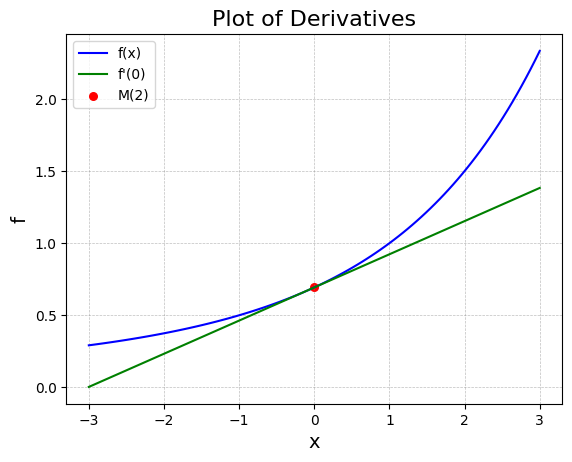

In [82]:
x_sequence = np.linspace(-3, 3, 100)
slope = 0.23
y_values = slope * x_sequence + 0.6931
f_num = np.array([f(i) for i in x_sequence])

plt.plot(integer_sequence, f_num, color='blue', label='f(x)')
plt.plot(x_sequence, y_values, color='green', label="f'(0)")
plt.scatter(0, 0.6931, c='red', marker='o', s=30, label='M(2)')

plt.xlabel('x', fontsize=14)
plt.ylabel('f', fontsize=14)
plt.title("Plot of Derivatives", fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

A constant $0.6931$. Let's try this for $3^x$ and $4^x$ as well.

In [59]:
def  g(x):
  return (3**x - 1) / x

def  h(x):
  return (4**x - 1) / x

In [60]:
lim.evaluate_limit(g, 0), lim.evaluate_limit(h, 0)

((True, 1.0986), (True, 1.3863))

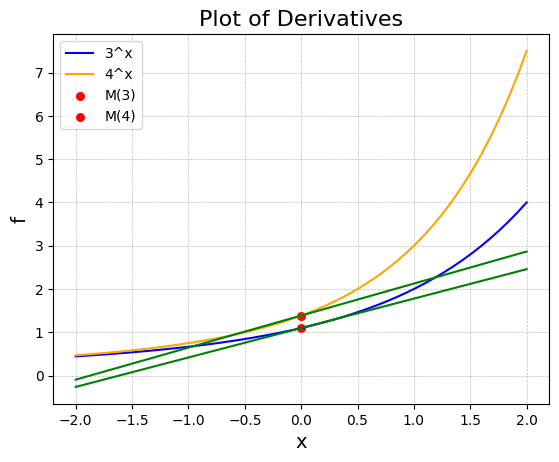

In [124]:
x_sequence = np.linspace(-2, 2, 50)
y_val1 = 0.68 * x_sequence + 1.0986
y_val2 = 0.74 * x_sequence + 1.3863
g_num = np.array([g(i) for i in x_sequence])
h_num = np.array([h(i) for i in x_sequence])

plt.plot(x_sequence, g_num, color='blue', label='3^x')
plt.plot(x_sequence, h_num, color='orange', label='4^x')

plt.plot(x_sequence, y_val1, color='green')
plt.plot(x_sequence, y_val2, color='green')
plt.scatter(0, 1.0986, c='red', marker='o', s=30, label='M(3)')
plt.scatter(0, 1.3863, c='red', marker='o', s=30, label='M(4)')

plt.xlabel('x', fontsize=14)
plt.ylabel('f', fontsize=14)
plt.title("Plot of Derivatives", fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend()
plt.show()

More constants $1.0986$ and $1.3863$.

Now, from earlier we found out that

$\frac{d}{dx} a^x = a^{x} * M(a)$

So $M(2) = 0.693, M(3) = 1.0986$ and $M(4) = 1.3863$. But what is $M(a)$?

Let's make an assumption that there is a number **e** that is unique and real so that $M(e)$ = 1.

Now, if we bring everything together -

$\frac{d}{dx} e^x = e^{x} * M(e) = e^{x} * 1$

$\boxed{\frac{d}{dx} e^x = e^x}$